# ร้านอาหารในปารีส

ตลอดแบบฝึกหัดในคอร์สนี้ เราจะทำงานกับชุดข้อมูลหลายชุดเกี่ยวกับเมืองปารีส

ในแบบฝึกหัดนี้ เราจะเริ่มจากการสำรวจชุดข้อมูลร้านอาหารในใจกลางกรุงปารีส (รวบรวมจาก Paris Open Data) ข้อมูลประกอบด้วยพิกัดตำแหน่งของร้านอาหารในรูปแบบจุด (point) และคำอธิบายประเภทร้านอาหาร

คาดว่าคุณมีพื้นฐานการใช้งานไลบรารี pandas สำหรับจัดการข้อมูลตาราง (DataFrame) แล้ว โดยในที่นี้เราจะใช้ pandas อ่านไฟล์ CSV ที่ให้มา จากนั้นใช้ matplotlib เพื่อสร้างภาพแสดงตำแหน่งจุดของร้านอาหาร

                                 type              x             y
0                 European restuarant  259641.691646  6.251867e+06
1       Traditional French restaurant  259572.339603  6.252030e+06
2       Traditional French restaurant  259657.276374  6.252143e+06
3  Indian / Middle Eastern restaurant  259684.438330  6.252203e+06
4       Traditional French restaurant  259597.943086  6.252230e+06


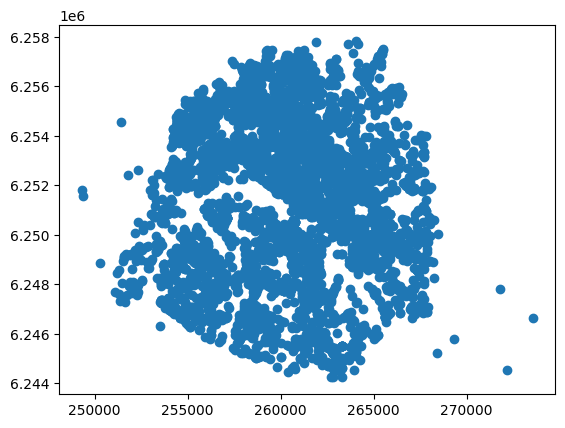

In [1]:
# Import pandas and matplotlib
import pandas as pd
import matplotlib.pyplot as plt

# Read the restaurants csv file
restaurants = pd.read_csv("../../data/raw/paris_restaurants.csv")

# Inspect the first rows of restaurants
print(restaurants.head())

# Make a plot of all points
fig, ax = plt.subplots()
ax.plot(restaurants['x'], restaurants['y'], 'o')
plt.show()

# การเพิ่มแผนที่พื้นหลัง

กราฟที่มีเพียงจุดข้อมูลอย่างเดียวอาจทำให้ตีความได้ยาก เพราะขาดบริบทเชิงพื้นที่

ดังนั้น ในแบบฝึกหัดนี้ เราจะเรียนรู้วิธีการเพิ่มแผนที่พื้นหลัง (background map) เพื่อช่วยให้มองเห็นตำแหน่งและความสัมพันธ์เชิงพื้นที่ได้ชัดเจนยิ่งขึ้น

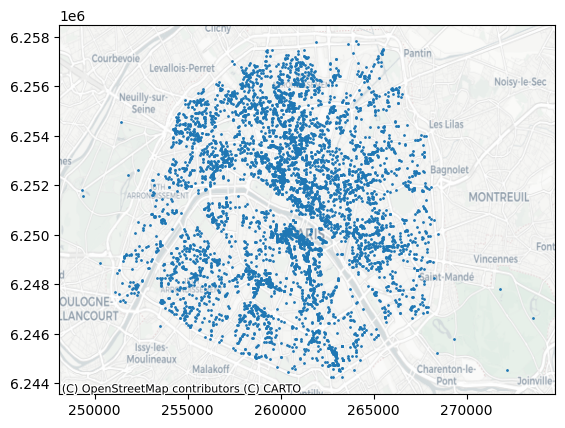

In [3]:
# Import contextily
import contextily as ctx

# A figure of all restaurants with background
fig, ax = plt.subplots()
ax.plot(restaurants['x'], restaurants['y'], 'o', markersize=1)
# ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)
plt.show()

## สำรวจเขตการปกครองของปารีส (I)

ในแบบฝึกหัดนี้ เราจะแนะนำชุดข้อมูลถัดไปเกี่ยวกับเมืองปารีส ได้แก่ ข้อมูลเขตการปกครอง (administrative districts) ของกรุงปารีส

   id           district_name  population  \
0   1  St-Germain-l'Auxerrois        1672   
1   2                  Halles        8984   
2   3            Palais-Royal        3195   
3   4           Place-Vendôme        3044   
4   5                 Gaillon        1345   

                                            geometry  
0  POLYGON ((451922.133 5411438.484, 451922.08 54...  
1  POLYGON ((452278.419 5412160.893, 452192.407 5...  
2  POLYGON ((451553.806 5412340.522, 451528.058 5...  
3  POLYGON ((451004.908 5412654.095, 450960.64 54...  
4  POLYGON ((451328.752 5412991.278, 451294.721 5...  


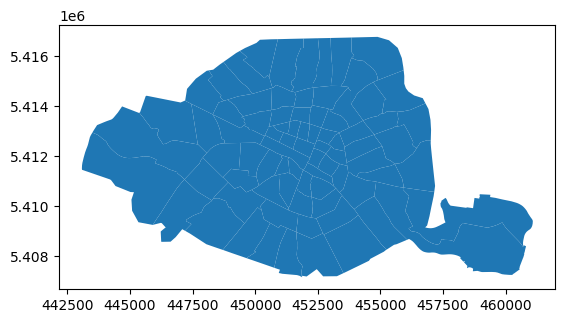

In [4]:
# Import GeoPandas
import geopandas as gpd

# Read the Paris districts dataset
districts = gpd.read_file("../../data/raw/paris_districts_utm.geojson")

# Inspect the first rows
print(districts.head())

# Make a quick visualization of the districts
districts.plot()
plt.show()

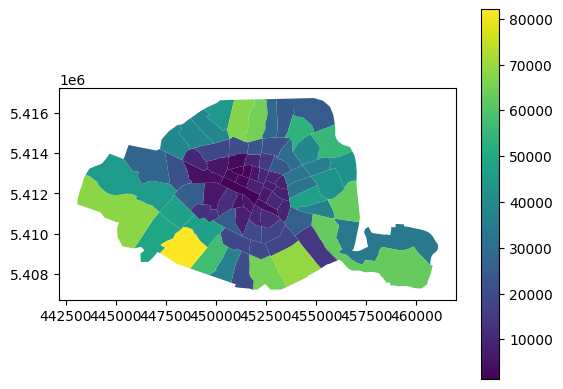

In [5]:
districts.plot(column='population', legend=True)
plt.show()

## สำรวจเขตการปกครองของปารีส (II)

ในแบบฝึกหัดก่อนหน้า เราได้ใช้เมธอด `plot()` ที่ปรับแต่งมาสำหรับ `GeoDataFrame` ซึ่งช่วยสร้างภาพแสดงรูปทรงเรขาคณิต (geometries) ของข้อมูลได้อย่างง่าย

วัตถุประเภท `GeoDataFrame` และ `GeoSeries` สามารถมองได้ว่าเป็น `DataFrame` และ `Series` ที่ “รับรู้เชิงพื้นที่” (spatial-aware) โดยเมื่อเทียบกับวัตถุของ pandas ปกติแล้ว จะมีเมธอดและแอตทริบิวต์เพิ่มเติมที่รองรับการทำงานด้านข้อมูลเชิงพื้นที่โดยเฉพาะ

In [6]:
# Check what kind of object districts is
print(type(districts))
print('=' * 20)

# Check the type of the geometry attribute
print(type(districts.geometry))
print('=' * 20)

# Inspect the first rows of the geometry
print(districts.geometry.head())
print('=' * 20)

# Inspect the area of the districts
print(districts.geometry.area)

<class 'geopandas.geodataframe.GeoDataFrame'>
<class 'geopandas.geoseries.GeoSeries'>
0    POLYGON ((451922.133 5411438.484, 451922.08 54...
1    POLYGON ((452278.419 5412160.893, 452192.407 5...
2    POLYGON ((451553.806 5412340.522, 451528.058 5...
3    POLYGON ((451004.908 5412654.095, 450960.64 54...
4    POLYGON ((451328.752 5412991.278, 451294.721 5...
Name: geometry, dtype: geometry
0     8.685379e+05
1     4.122371e+05
2     2.735494e+05
3     2.693111e+05
4     1.879097e+05
          ...     
75    1.294254e+06
76    8.061191e+05
77    1.486139e+06
78    1.598127e+06
79    2.089783e+06
Length: 80, dtype: float64


## ร้านอาหารในปารีสในรูปแบบ GeoDataFrame

ในแบบฝึกหัดเขียนโค้ดแรกของบทนี้ เราได้นำเข้าข้อมูลพิกัดร้านอาหารในปารีสจากไฟล์ CSV มาเป็น pandas DataFrame

เพื่อให้สามารถใช้ความสามารถด้านข้อมูลเชิงพื้นที่ของ GeoPandas ได้ เราจำเป็นต้องแปลง pandas DataFrame ให้เป็น GeoDataFrame โดยสามารถทำได้ด้วยตัวสร้าง `GeoDataFrame()` และฟังก์ชัน `geopandas.points_from_xy()` ซึ่งได้เตรียมขั้นตอนนี้ไว้ให้แล้ว

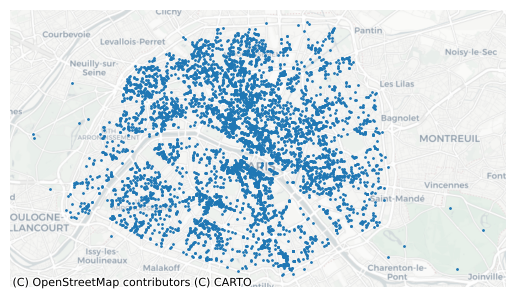

In [8]:
# Read the restaurants csv file into a DataFrame
df = pd.read_csv("../../data/raw/paris_restaurants.csv")

# Convert it to a GeoDataFrame
# 2) สร้าง GeoDataFrame พร้อมกำหนด CRS ที่ถูกต้อง (EPSG:3857)
restaurants_3857 = gpd.GeoDataFrame(
    df,
    geometry=gpd.points_from_xy(df.x, df.y),
    crs="EPSG:3857"
)

# 3) แปลงไป WGS84 แล้วค่อย export เป็น GeoJSON (มาตรฐานทั่วไป)
restaurants_4326 = restaurants_3857.to_crs("EPSG:4326")
restaurants_4326.to_file("../../data/processed/paris_restaurants.geojson", driver="GeoJSON")

# 4) Plot พร้อม basemap (ต้องใช้ 3857)
ax = restaurants_3857.plot(markersize=1)
ctx.add_basemap(ax, crs=restaurants_3857.crs, source=ctx.providers.CartoDB.Positron)
ax.set_axis_off()
plt.show()

## การแสดงภาพความหนาแน่นประชากร

กลับมาที่ชุดข้อมูลเขตการปกครองกันอีกครั้ง ในแบบฝึกหัดก่อนหน้าเราได้แสดงผลเขตต่าง ๆ ด้วยสีเดียวกันทั้งหมด

แต่โดยทั่วไป เรามักต้องการแสดงความแตกต่างเชิงพื้นที่ของตัวแปรบางตัว เช่น ความหนาแน่นประชากร โดยใช้สีที่แตกต่างกันในแต่ละพื้นที่ (polygon) ตามค่าของตัวแปรนั้น

   id           district_name  population  \
0   1  St-Germain-l'Auxerrois        1672   
1   2                  Halles        8984   
2   3            Palais-Royal        3195   
3   4           Place-Vendôme        3044   
4   5                 Gaillon        1345   

                                            geometry  
0  POLYGON ((451922.133 5411438.484, 451922.08 54...  
1  POLYGON ((452278.419 5412160.893, 452192.407 5...  
2  POLYGON ((451553.806 5412340.522, 451528.058 5...  
3  POLYGON ((451004.908 5412654.095, 450960.64 54...  
4  POLYGON ((451328.752 5412991.278, 451294.721 5...  
0     8.685379e+05
1     4.122371e+05
2     2.735494e+05
3     2.693111e+05
4     1.879097e+05
          ...     
75    1.294254e+06
76    8.061191e+05
77    1.486139e+06
78    1.598127e+06
79    2.089783e+06
Length: 80, dtype: float64


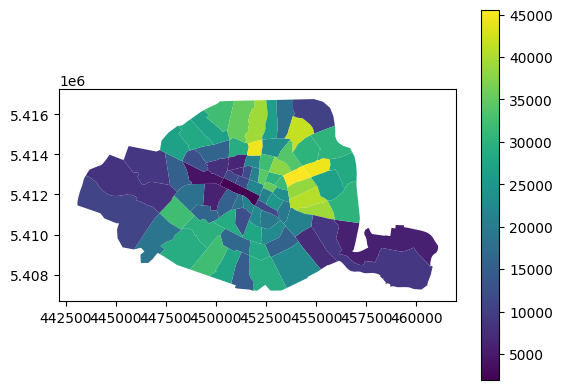

In [9]:
# Inspect the first rows of the districts dataset
print(districts.head())
print('=' * 20)

# Inspect the area of the districts
print(districts.geometry.area)
print('=' * 20)
# Add a population density column
districts['population_density'] = districts['population'] / districts.geometry.area * 10**6

# Make a plot of the districts colored by the population density
districts.plot(column='population_density', legend=True)
plt.show()

## การใช้ความสามารถของ pandas: groupby

แม้คอร์สนี้จะเน้นการใช้งานความสามารถเชิงพื้นที่ของ GeoPandas เป็นหลัก แต่อย่าลืมว่าเรายังคงทำงานอยู่กับ DataFrame ดังนั้นฟังก์ชันต่าง ๆ ที่คุณคุ้นเคยจาก pandas เช่น `groupby` ก็ยังสามารถนำมาใช้งานได้ตามปกติ

In [10]:
# Load the restaurants data
restaurants = gpd.read_file("../../data/processed/paris_restaurants.geojson")

# Calculate the number of restaurants of each type
type_counts = restaurants.groupby('type').size()

# Print the result
print(type_counts)

type
African restaurant                        138
Asian restaurant                         1642
Caribbean restaurant                       27
Central and South American restuarant      97
European restuarant                      1178
Indian / Middle Eastern restaurant        394
Maghrebian restaurant                     207
Other world restaurant                    107
Traditional French restaurant            1945
dtype: int64


## การพล็อตหลายเลเยอร์ (Plotting multiple layers)

อีกหนึ่งความสามารถพื้นฐานของ pandas คือการกรองข้อมูล (filtering)  
โดยเลือกเฉพาะบางแถวตามเงื่อนไขที่กำหนด ซึ่งจะได้ผลลัพธ์เป็น Boolean mask สำหรับใช้สร้างชุดข้อมูลย่อย (subset) เพื่อนำไปวิเคราะห์หรือพล็อตแยกเป็นหลายเลเยอร์

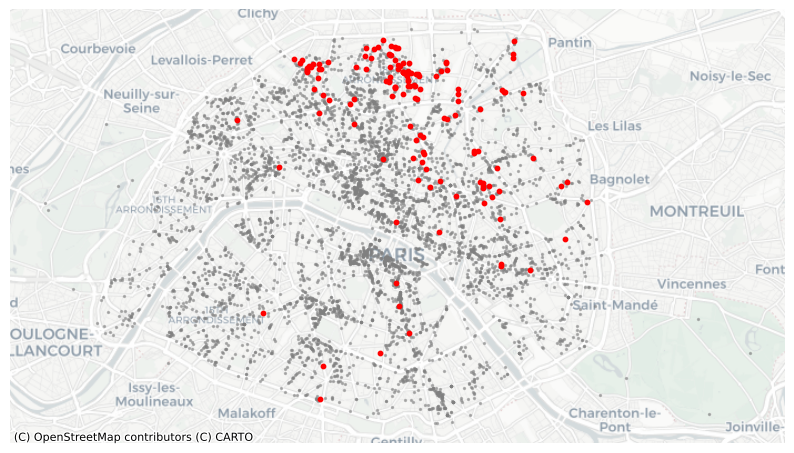

In [ ]:
# Load the restaurants dataset
restaurants = gpd.read_file("../../data/processed/paris_restaurants.geojson")
# restaurants.set_crs(epsg=3857, allow_override=True, inplace=True)
restaurants = restaurants.to_crs(epsg=3857)
# Take a subset of the African restaurants
african_restaurants = restaurants[restaurants['type']=="African restaurant"]

# Make a multi-layered plot
fig, ax = plt.subplots(figsize=(10, 10))
restaurants.plot(ax=ax,color='grey', markersize=2 ,alpha=0.5)
african_restaurants.plot(ax=ax, color='red', markersize=10, )
ctx.add_basemap(ax, crs=restaurants.crs, source=ctx.providers.CartoDB.Positron)
# Remove the box, ticks and labels
ax.set_axis_off()
plt.show()

In [15]:
restaurants = gpd.read_file("../../data/processed/paris_restaurants.geojson")
print(restaurants.crs)
print(restaurants.bounds)

EPSG:4326
          minx       miny      maxx       maxy
0     2.332401  48.864299  2.332401  48.864299
1     2.331778  48.865260  2.331778  48.865260
2     2.332541  48.865932  2.332541  48.865932
3     2.332785  48.866285  2.332785  48.866285
4     2.332008  48.866444  2.332008  48.866444
...        ...        ...       ...        ...
5730  2.330367  48.874266  2.330367  48.874266
5731  2.326990  48.876706  2.326990  48.876706
5732  2.405123  48.859395  2.405123  48.859395
5733  2.405795  48.859037  2.405795  48.859037
5734  2.407781  48.852899  2.407781  48.852899

[5735 rows x 4 columns]
